# Movie Reviews Analysis: Statistics analisis, Visualising results and getting Predictions.

### In this project We will continue with the analysis of the movie review, but this time we are going to use statistics to programm manually in python the linear regression and see how far away the data is from the prediction, so can see our accuracy.

- slope, intercept, r_value, p_value, stderr

In [26]:
import pandas as pd

movies = pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

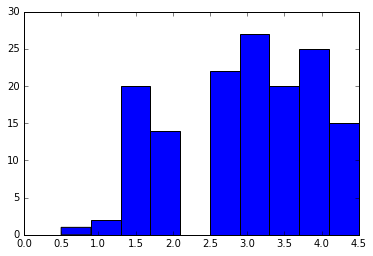

In [28]:
plt.hist(movies["Metacritic_norm_round"])
plt.show()

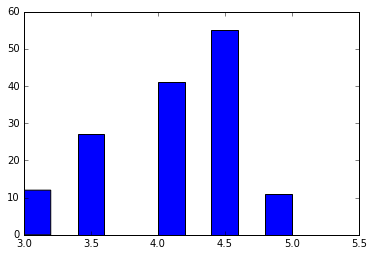

In [29]:
plt.hist(movies["Fandango_Stars"])
plt.show()

- As we can see, there is a huge difference between the review scores from Fandango and Metacritic. Metacritic has far more review scores greater than 3.


# Mean, Median, And Standard Deviation

- Let's quantify the difference that we can appreciate in both histograms.

In [30]:
import numpy as np


In [31]:
means =[movies["Fandango_Stars"].mean(),  movies["Metacritic_norm_round"].mean()]

In [32]:
print(means)

[4.0890410958904111, 2.9726027397260273]


In [33]:
medians = [np.median(movies["Fandango_Stars"]), np.median(movies["Metacritic_norm_round"])]

In [34]:
print(medians)

[4.0, 3.0]


In [35]:
std_dev = [movies["Fandango_Stars"].std(),  movies["Metacritic_norm_round"].std()]

In [36]:
print(std_dev)

[0.54038597797873344, 0.99096056137433586]


### Methodologies for Metacritic and Fandango

- Metacritic, do not use the user votes. You can see the votes, but the main score that appear is independent and just take the votes from professional people.
- Fandango, it takes user votes in a system of 5 stars. all the movies get a rate of 3+,

### Some insigths from the data

- We can apreciate that, while the mean in Matacritic is lower than the median, in Fandango it is the opposite, the means are higher than the median. It is due to the reason that the data in Fandango is skewed to the high values, always >3.

- Standard deviation: We can appreciate how it is much lower in Fandango than in Metacritic, this is because ...

- The mean from Fandango is much higher because the values in it goes from 3 to 5 and in Metacritic they go from 1 to 5.

- Finally, we can appreciate that the standard deviation is lower in Fandango than in Metacritic, it suggest that the data is more spread out from the mean in Metacritic than in Fandango, so in Fandango it is more correlated. We will see it.

# Scatter Plots

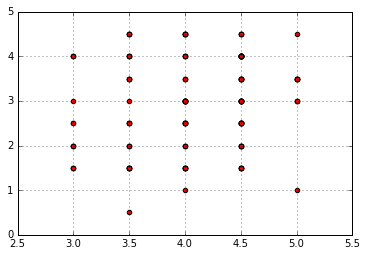

In [37]:
plt.scatter(movies["Fandango_Stars"], movies["Metacritic_norm_round"], c="r")
plt.grid()
plt.show()

In [38]:
# Continue with the second point.

In [39]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [40]:

movies.sort_values(by="fm_diff", ascending=False).head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


# Correlations

In [49]:
from scipy.stats import pearsonr 

In [53]:
r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])
r_value

0.17844919073895918

- As we can see, the r_value which give us the correlation between "Fandango_Stars" and "Metacritic_norm_round" is close to zero which means the both variables have a low correlation.

In [52]:
from scipy.stats import linregress

In [57]:
slope, intercept, r_value, p_value, stderr = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [58]:
r_value

0.17844919073895882

##### Let's try to predict what a 3.0 score from Metacritic will result on Fandango.

In [59]:
value_to_pred = 3
pred_3 = value_to_pred * slope + intercept
pred_3

4.0917071528212041

# Finding Residuals

##### Let's see if both variables are linearly related or not

In [60]:
pred_1 = 1*slope + intercept
pred_1

3.897084996873347

In [61]:
pred_5 = 5*slope + intercept
pred_5

4.2863293087690604

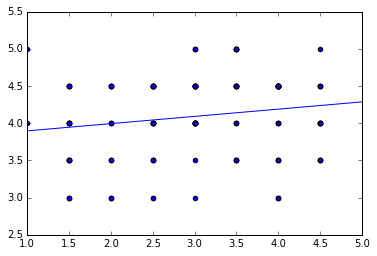

In [65]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim([1.0, 5.0])
plt.show()